# Imports

In [203]:
import math
from datetime import datetime
import requests
from pydataset import data
import csv


# Get Bitcoin Information - Glassnode

In [204]:
cookie = "_gcl_au=1.1.844624256.1712637157; _gid=GA1.2.506799906.1712637158; crisp-client%2Fsession%2F92942f99-f508-4f5f-8509-fb99ef741acc=session_87be6cbb-354b-4f36-a178-c5a30d8eba8c; _hjSessionUser_1425107=eyJpZCI6ImE2NTZmNTc0LTg0M2ItNWY5MC05OGM4LWM2MjIyMGIwNDFlNiIsImNyZWF0ZWQiOjE3MTI2MzcxNTkzMTAsImV4aXN0aW5nIjp0cnVlfQ==; _hjSession_1425107=eyJpZCI6ImE0YzA1YTBjLWJlN2ItNGY4NC1hZGEzLTJiOWExNDgwMGQ3OSIsImMiOjE3MTI2MzkyMDM0NzUsInMiOjEsInIiOjEsInNiIjowLCJzciI6MCwic2UiOjAsImZzIjowLCJzcCI6MH0=; _ga_M9YVRZCN8G=GS1.1.1712639785.2.1.1712641983.0.0.0; _ga_MT5MWT6847=GS1.1.1712639785.2.1.1712641983.53.0.0; _ga=GA1.2.1384897898.1712637158; _s=MTcxMjY0MTk4OHx2OHNrNXlqSVl4aHNLd19XWEZDbTZibXhrMzl4X2d2Q3o2ZkVFeDF4Qk4zZTIxbWlUNFRBZXhjNHNGSHV0T3c9fHC2pJx8ngM9UsqANT6rRBS29WRn5g55ZpVIQSel5oDR"

# 🔵🔵🔵🔵🔵 adress
# add dates from address request into its own array
total_days_add = []
# add addresses from address request into its own array
total_add = []
# add all data from address request into its own dictionary for formatting later
gdAddData = {}
# url for address request
addressesUrl = "https://api.glassnode.com/v1/metrics/addresses/count?a=BTC&c=native&i=24h&referer=charts"
# headers for address request
addressHeader = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36 OPR/107.0.0.0",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7",
    "Accept-Encoding": "gzip, deflate, br",
    "Accept-Language": "en-US,en;q=0.9",
    "Referer": "https://charts.example.com",  # Update this with the actual referer value
    "Cookie": cookie
}
# the response
addressResponse = requests.get(addressesUrl, headers=addressHeader)
# if the response was successful
if addressResponse.status_code == 200:
    a_data = addressResponse.json()
    gdAddData = a_data
    for i in range(len(a_data)):
      a_days = a_data[i]['t']
      a_value = a_data[i]['v']
      if a_days is not None:
          appenddays = total_days_add.append(a_days)
          appendvalue = total_add.append(a_value)
# error handling
else:
    print("Request failed with status code:", addressResponse.status_code)
# ----------------------------- 🔵🔵🔵🔵🔵

# 🔴🔴🔴🔴🔴 prices
# add dates from prices request into its own array
total_days_prices = []
# add prices from prices request into its own array
total_prices = []
# add all data from prices request into its own dictionary for formatting later
gdPricedata = {}
# url for prices request
pricesUrl = "https://api.glassnode.com/v1/metrics/market/price_usd_close?a=BTC&i=24h&referer=charts"
# headers for prices request
pricesHeader = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36 OPR/107.0.0.0",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7",
    "Accept-Encoding": "gzip, deflate, br",
    "Accept-Language": "en-US,en;q=0.9",
    "Referer": "https://charts.example.com",  # Update this with the actual referer value
    "Cookie": cookie
}
# the response
pricesResponse = requests.get(pricesUrl, headers=pricesHeader)
# if the response was successful
if pricesResponse.status_code == 200:
    p_data = pricesResponse.json()
    gdPricedata = p_data
    for i in range(len(p_data)):
      p_days = p_data[i]['t']
      p_prices = p_data[i]['v']
      if p_days is not None:
          appenddays = total_days_prices.append(p_days)
          appendprices = total_prices.append(p_prices)
# error handling
else:
    print("Request failed with status code:", pricesResponse.status_code)
# ----------------------------- 🔴🔴🔴🔴🔴

# 🟢🟢🟢🟢🟢 hash rate mean 
# add dates from hash rate request into its own array
total_days_hashRate = []
# add hash rate from prices request into its own array
total_hashRates= []
# add all data from hash rate request into its own dictionary for formatting later
gdHashRatedata = {}
# url for hash rate request
hashRateMeanUrl = "https://api.glassnode.com/v1/metrics/mining/hash_rate_mean?a=BTC&c=native&i=24h&referer=charts"
# headers for hash rate request
hashRateHeader = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36 OPR/107.0.0.0",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7",
    "Accept-Encoding": "gzip, deflate, br",
    "Accept-Language": "en-US,en;q=0.9",
    "Referer": "https://charts.example.com",  # Update this with the actual referer value
    "Cookie": cookie
}
# the response
hashRateResponse = requests.get(hashRateMeanUrl, headers=hashRateHeader)
# if the response was successful
if hashRateResponse.status_code == 200:
    hr_data = hashRateResponse.json()
    gdHashRatedata = hr_data
    for i in range(len(hr_data)):
      hr_days = hr_data[i]['t']
      hr_hrate = hr_data[i]['v']
      if hr_days is not None:
          appenddays = total_days_hashRate.append(hr_days)
          appendprices = total_hashRates.append(hr_hrate)
# error handling
else:
    print("Request failed with status code:", hashRateResponse.status_code)
# ----------------------------- 🟢🟢🟢🟢🟢


# dictionary to format response data
formatteddict = {}
formattedArr = []

# figure out offsets in data:
offset = len(gdAddData) - len(gdPricedata)
offsethr = len(gdHashRatedata) - len(gdPricedata)
formattedAdressArr = gdAddData[offset:]
formattedPriceArr = gdPricedata
formattedHashRateArr = gdHashRatedata[offsethr:]

# loop through data and add to dictionary
for i in range(len(formattedAdressArr)):
    formattedArr.append([formattedPriceArr[i]["t"], formattedAdressArr[i]["v"], formattedPriceArr[i]["v"], formattedHashRateArr[i]["v"]])     

btcdate =  formattedArr[-1][0]
formattedbtcdate =  datetime.fromtimestamp(btcdate).strftime('%Y-%m-%d')
btcaddresses = formattedArr[-1][1]
btcprice = formattedArr[-1][2]
btchashrate = formattedArr[-1][3]

startdate = datetime.fromtimestamp(formattedArr[0][0]).strftime('%Y-%m-%d')
enddate = datetime.fromtimestamp(formattedArr[-1][0]).strftime('%Y-%m-%d')
daysSinceCrreationNumber = len(total_days_add)


# Power Law Model

In [205]:

readable_time = datetime.fromtimestamp(btcdate).strftime('%Y-%m-%d')


# second equation i found on twitter
def powerlaw(thedays):
    theans = (10 ** -17 ) * ( thedays ** 5.83 )
    return theans

def calculate_time():
    
    readable_year = datetime.fromtimestamp(btcdate).strftime('%Y')
    readable_month = datetime.fromtimestamp(btcdate).strftime('%m')
    readable_day = datetime.fromtimestamp(btcdate).strftime('%d')

    year = int(readable_year)
    month = int(readable_month)
    day = int(readable_day)

    start_date = datetime(2009, 1, 3)
    end_date = datetime(year, month, day)

    # Calculate the difference in days
    difference_in_days = (end_date - start_date).days

    
    # Calculate the number of seconds
    seconds_in_a_day = 24 * 60 * 60
    # seconds_in_a_day = 1
    total_seconds = (difference_in_days ) * seconds_in_a_day
    return total_seconds

total_seconds = calculate_time()

# formatting.....
def formatAnswer(result):
    strans = ''
    losres = math.log10(result) 
    strresult = str(losres)
    for i in range(0, 6):            
        strans += strresult[i]
    return strans.replace('.', ',')
def formatAddressNumber(current_addresses_total):
    straddresses = str(current_addresses_total)
    newstr = ''
    count = 0
    for num in reversed(straddresses):
        if count == 3:
            newstr += ','
            count = 0
        newstr += num
        count += 1
    formatedaddresses = newstr
    return formatedaddresses[::-1]
def formatHashRate(current_btchashrate):
    strhashrate = str(current_btchashrate)
    newstr = ''
    count = 0
    for num in strhashrate:
        if count == 3:
            newstr += ','
            count = 0
        newstr += num
        count += 1
    formattedhashrate = newstr
    return formattedhashrate[::1]

ans = powerlaw(daysSinceCrreationNumber)
addresses = formatAddressNumber(btcaddresses)
hashrate = formatHashRate(btchashrate)


# Outputs

In [206]:
print("Power Law Stuff:", '\n')

print("Bitcoin Price Prediction:", ans)
print("---------------------------------|", '\n')

print("Total Bitcoin Addresses:", addresses)
print("Bitcoin Hashrate:", hashrate, "Hs")
# im using total_day_add because this data goes back the furthest
print("Days since creation:", daysSinceCrreationNumber)
print("Years since creation:", daysSinceCrreationNumber / 365)
print("Latest Day:", readable_time)
print("Bitcoin Actual Close Price:", btcprice)
# print("Second Equation Prediciton:", second_try_predicted_prices)


Power Law Stuff: 

Bitcoin Price Prediction: 67205.15922230436
---------------------------------| 

Total Bitcoin Addresses: 1,269,909,209
Bitcoin Hashrate: 558,124,196,356,609,000,000 Hs
Days since creation: 5546
Years since creation: 15.194520547945206
Latest Day: 2024-04-09
Bitcoin Actual Close Price: 70514.28371120086


options stuff

In [207]:
oneday = 100000
inthefuture = (317 / 2)
optiondate = daysSinceCrreationNumber + inthefuture
futredate = formattedArr[-1][0] + (oneday * inthefuture)
ans = powerlaw(optiondate)
print(ans)
pch = 1.00 - (btcprice / ans)

formattedpchDate = datetime.fromtimestamp(futredate).strftime('%Y-%m-%d')
print(pch, "by:", formattedpchDate)

79204.25575138755
0.10971597369039676 by: 2024-10-10


# Linear Regression Stuff

In [208]:
import sys
import scipy
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas
import pandas_datareader as pdr
import sklearn
from pandas import read_csv
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sb


Prep the data

In [209]:
mlDaysArray = []
mlNumofAddressesArray = []
mlPriceArray = []

for i in range(len(formattedArr)):
    mlDaysArray.append(formattedArr[i][0])
    mlNumofAddressesArray.append(formattedArr[i][1])
    mlPriceArray.append(formattedArr[i][2])

def saveToCsv(filename):
    with open(filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Day', 'NumberOfAddresses', 'Price'])  # Write header row
        for day, num_addresses, price in zip(mlDaysArray, mlNumofAddressesArray, mlPriceArray):
            writer.writerow([day, num_addresses, price])

saveToCsv("BtcData")


Start plot data

In [210]:
data = read_csv("BtcData")
regdata = pandas.DataFrame(data, columns=["Day", "NumberOfAddresses", "Price"])
logdata = (np.log(data).diff()).dropna()
regdata.tail()

,Day,NumberOfAddresses,Price
5012,1712361600,1268190122,68960.285355
5013,1712448000,1268647253,69374.900421
5014,1712534400,1269100201,71634.154230
5015,1712620800,1269503574,69148.722511
5016,1712707200,1269909209,70514.283711


In [211]:
# get slope and intercept
'''
In this case, it suggests that for each additional 
unit increase in NumberOfAddresses, the Price 
increases by approximately 3.33e-05 (or 0.0000333).'''
reg = np.polyfit(x=regdata["NumberOfAddresses"], y=regdata["Price"], deg=1)
reg

array([ 3.37472292e-05, -2.33439799e+03])

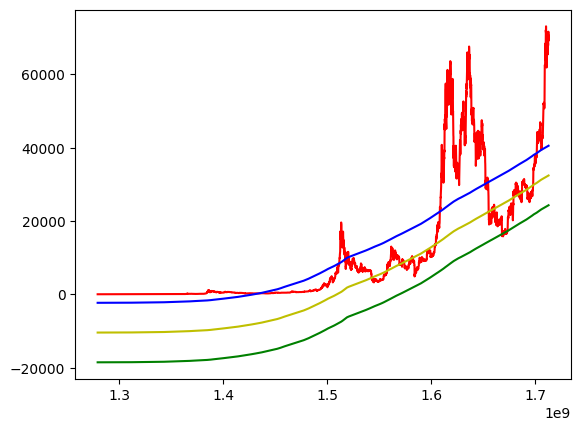

In [212]:
trend = np.polyval(reg, regdata["NumberOfAddresses"])
std = regdata["Price"].std()
# Red line. NumberOf Addresses is X, Price is Y
plt.plot(regdata["Day"], regdata["Price"], 'r')
# Blue line. Trend of number of addresses to the price.
plt.plot(regdata["Day"], trend, 'b')
# Yellow line. Shifting down this trend to get a good midpoint buying range.
plt.plot(regdata["Day"], trend - (std / 2), 'y')
# Green line. Shifting down this trend to get a good buying range
plt.plot(regdata["Day"], trend - std, 'g')